In [4]:
import requests
# URL of the file to be downloaded
url = "https://zenodo.org/api/records/2686862/files-archive"
# Send HTTP request to the specified URL and save the response from server in a response object called r
r = requests.get(url)
# Open a new file in binary mode and write the contents into it
with open("datasets", "wb") as file:
    file.write(r.content)

In [5]:
import zipfile
# Specify the zip file name
zip_file = "datasets"
# Open the zip file in read mode
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Extract all the contents of the zip file in the current directory
    zip_ref.extractall()

In [6]:
!unzip "tweets.csv.zip"
!unzip "companies.csv.zip"
!unzip "entities.csv.zip"
!unzip "users.csv.zip"

Archive:  tweets.csv.zip
replace tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  companies.csv.zip
replace companies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._companies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  entities.csv.zip
replace entities.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._entities.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [1]:
import pandas as pd
tweets = pd.read_csv("tweets.csv")

tweets.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu May 18 22:00:02 +0000 2017
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:02 +0000 2017


In [2]:
entities = pd.read_csv("entities.csv")

entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [13]:
companies = pd.read_csv("companies.csv")

companies.head()

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [13]:
users = pd.read_csv("users.csv", on_bad_lines='skip')
users['bot'] = users['bot'].fillna("Unknown")
users['created_at'] = pd.to_datetime(users['created_at'])

users.head()

<ipython-input-13-c91e61c7641d>:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv("users.csv", on_bad_lines='skip')


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,verified,description,created_at,bot
0,859451814940336128,Nao,sovereignao,2460,181,399,5247,6,NaN,en,Pacific Time (US & Canada),HODLing fast on,NaN,Self-sovereign,2017-05-02 16:57:35+00:00,Unknown
1,44060322,Benzinga.com,Benzinga,126228,59237,1617,2774,2310,http://www.benzinga.com/,en,Eastern Time (US & Canada),Zingernation,1.0,Financial news site. Creator of Benzinga Pro: ...,2009-06-02 04:43:10+00:00,Unknown
2,713570637306986496,Best Investings,bestinvestings,2718,27,0,0,3,NaN,en,Pacific Time (US & Canada),IN THE CHARTS,NaN,May or may not give you the best investing adv...,2016-03-26 03:37:52+00:00,Unknown
3,823239593151655936,thestocklist,thestocklist,447,25,9,3,2,http://thestocklist.com,en,Eastern Time (US & Canada),U.S.A.,NaN,Check out my new website http://thestocklist.c...,2017-01-22 18:43:08+00:00,Unknown
4,44367489,MM&M Magazine,MMMnews,11078,9277,548,90,783,http://www.mmm-online.com,en,Quito,"New York, NY, USA",NaN,"MM&M: the most objective, relevant, and timely...",2009-06-03 14:20:16+00:00,Unknown


##  Cashtag-cloud of most tweeted companies

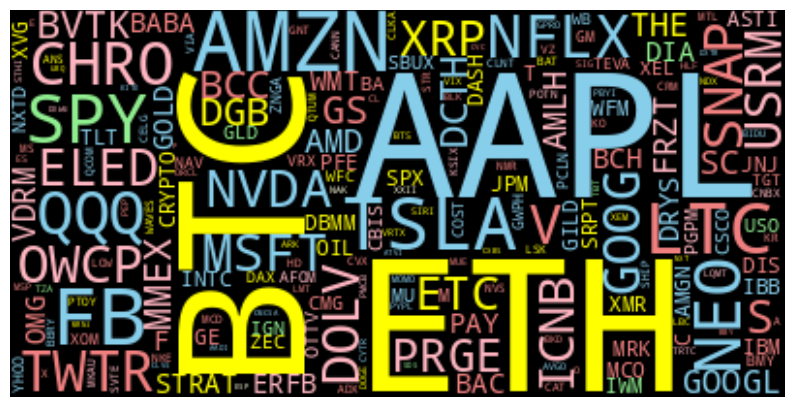

In [17]:
# Load the libraries
import re
import wordcloud
import matplotlib.pyplot as plt
import pandas as pd

# Get the cashtags from the tweet texts
tweets['cashtags'] = tweets['text'].apply(lambda x: set(re.findall(r'\$[A-Za-z][\w]*', x)).map(lambda y: y[1:].upper()))

# Count how many times each cashtag appears
cashtag_counts = pd.Series([item for sublist in tweets['cashtags'] for item in sublist]).value_counts()

# Assign a color to each market exchange
market_colors = {
    'NASDAQ': 'skyblue',
    'NYSE': 'lightcoral',
    'NYSEARCA': 'lightgreen',
    'NYSEMKT': 'lightyellow',
    'OTCMKTS': 'lightpink',
    'OTHERS': 'lightgray'
    # Add more markets and their colors here
}

# Join the company data with the cashtag counts
data = cashtag_counts.to_frame().join(companies.set_index('ticker'))

# Make a color function that returns the color of each cashtag
def color_func(word, *args, **kwargs):
    return market_colors.get(data.loc[word, 'exchange'], 'yellow')

# Generate a word cloud from the cashtag frequencies
wordcloud = wordcloud.WordCloud(color_func=color_func).generate_from_frequencies(cashtag_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cashtag Word Cloud by Market Exchange')
plt.show()

In [5]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

tweets.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2017-05-18 22:00:02+00:00
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:02+00:00


## Mean tweet volume per hour.
Peak hours overlap with the opening hours of the New York Stock Exchange (red band).


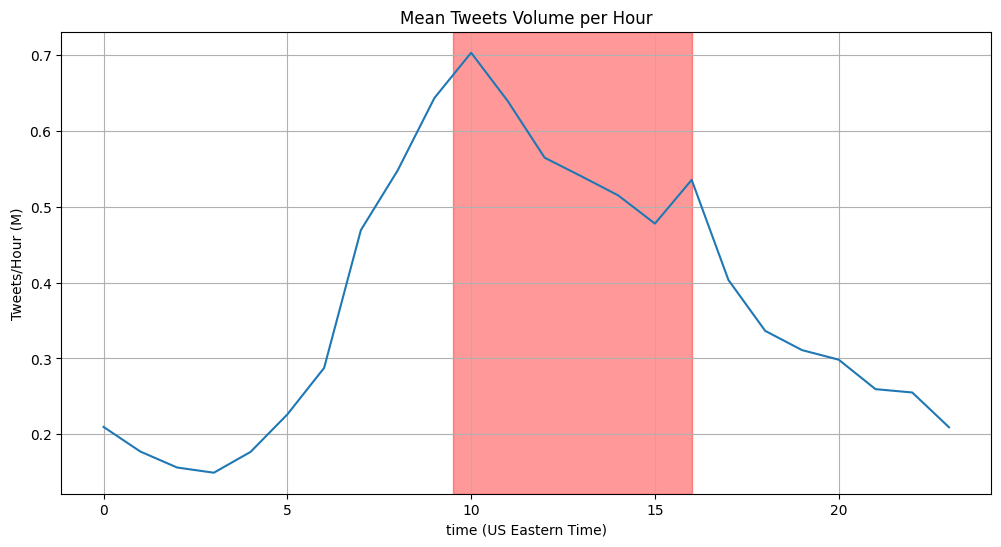

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz

# Convert the 'created_at' column to US Eastern Time
tweets['US_Eastern_Time'] = tweets['created_at'].dt.tz_convert('US/Eastern')

# Extract the hour from the 'created_at' column
tweets['hour'] = tweets['US_Eastern_Time'].dt.hour

# Group by the hour and calculate the mean number of tweets
mean_tweets_by_hour = tweets.groupby('hour').size()/10 ** 6

# Plot the result
plt.figure(figsize=(12, 6))
plt.axis('on')
mean_tweets_by_hour.plot()
plt.title('Mean Tweets Volume per Hour')
plt.xlabel('time (US Eastern Time)')
plt.ylabel('Tweets/Hour (M)')
plt.axvspan(9.5, 16, color='red', alpha=0.4)
plt.grid()
plt.show()

## Distribution of the number of cashtags per tweet.

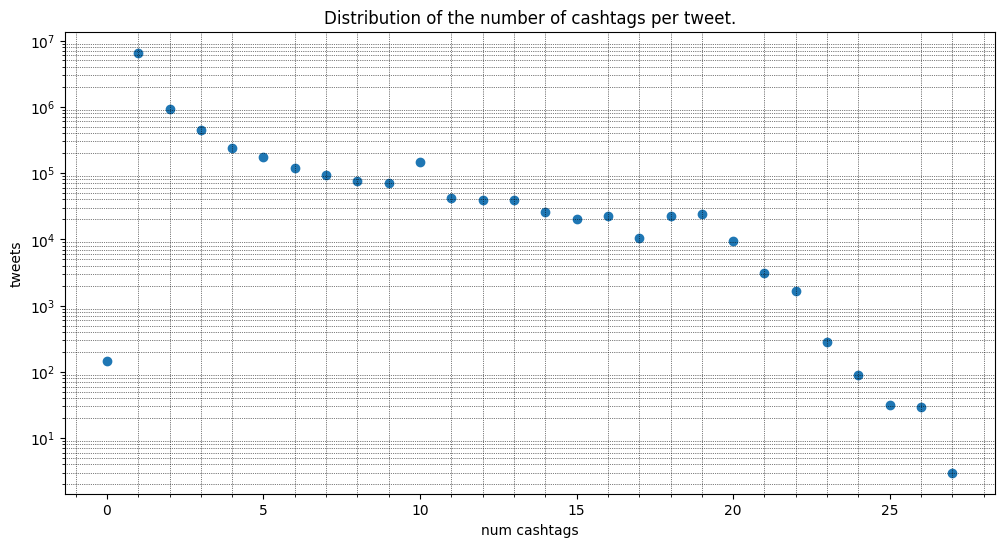

In [12]:
tweets['cashtags_count'] = tweets['cashtags'].apply(len)
cashtag_counts = tweets['cashtags_count'].value_counts()

plt.figure(figsize=(12, 6))
plt.scatter(cashtag_counts.index, cashtag_counts.values)
plt.title('Distribution of the number of cashtags per tweet.')
plt.xlabel('num cashtags')
plt.ylabel('tweets')
plt.yscale('log')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# As you can see, we reached exactly, to some results of the paper